3.6.9
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.24951319019242818
0.4953415300396182
0.49824164378181107
0.49718473885893666
0.49555106991531406
0.5026044210830113
0.5012943486280872
0.4958970831005822
speed of light in vacuum 299694109.563299
speed of light in media (71697268.16980524+64609903.10930402j)
frequency =  9365440923.853092
propagation const =  (408.15697784048956+452.9296421649142j)
intrinsic impedance =  (90.097444385887+81.19119878293512j)
tranmission coef =  (0.4331258892416866+0.27236031348587497j)
reflection coef = (-0.5668741107583133+0.27236031348587497j)
observation time point 250
observation point z = 0.1
attenuation term =  1.8791769526577893e-18


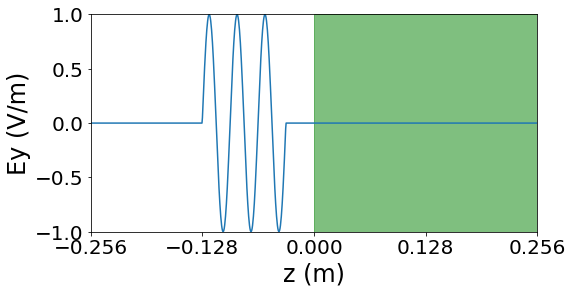

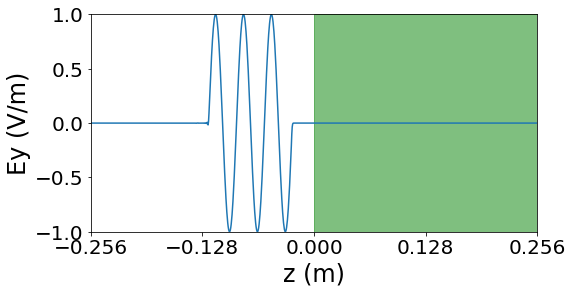

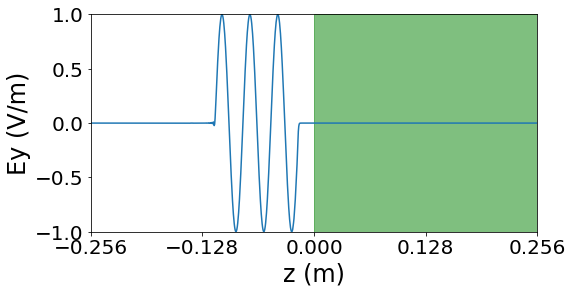

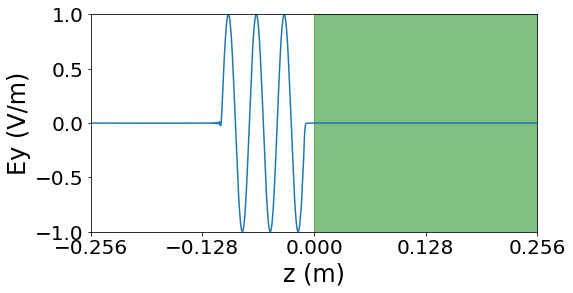

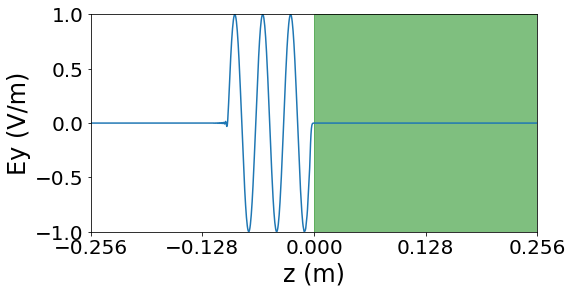

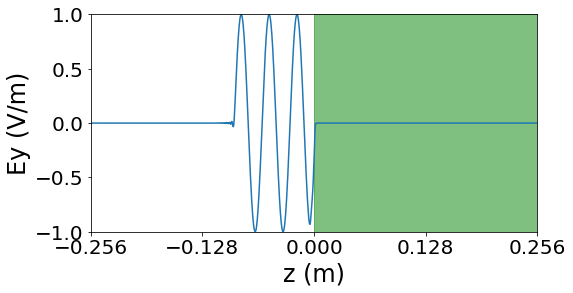

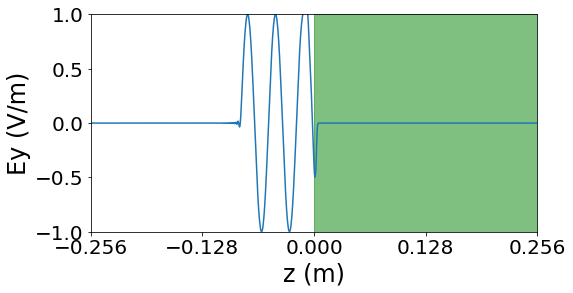

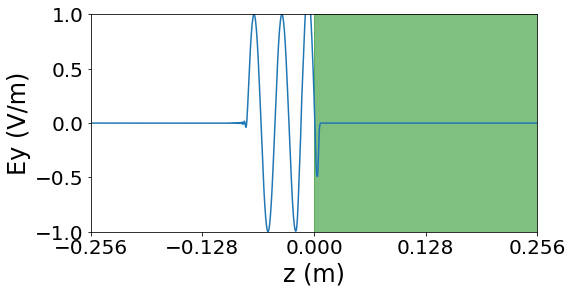

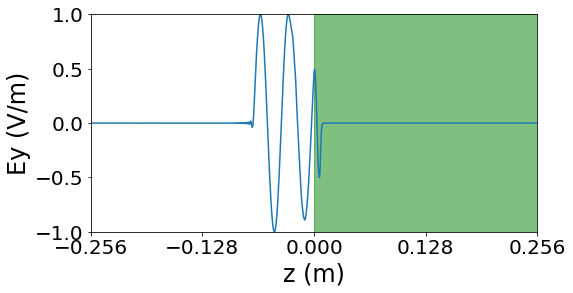

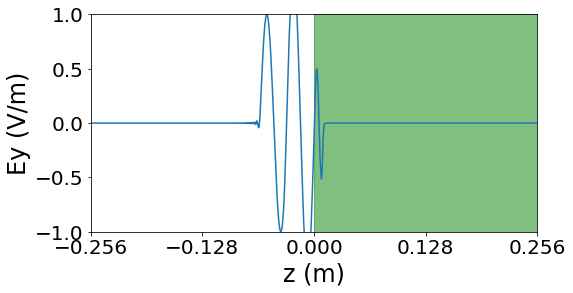

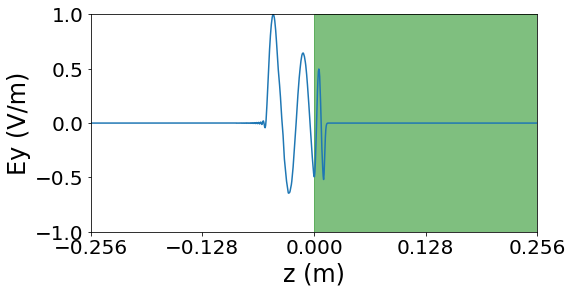

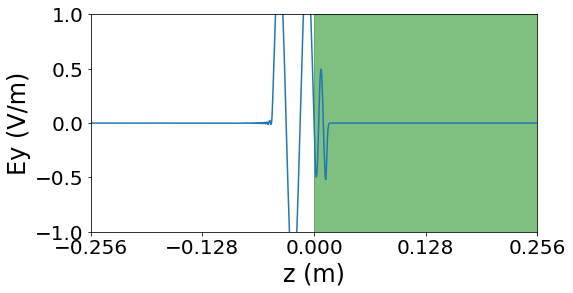

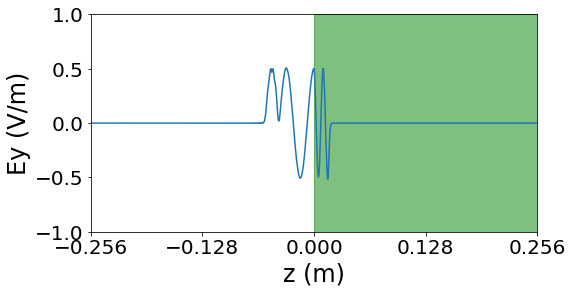

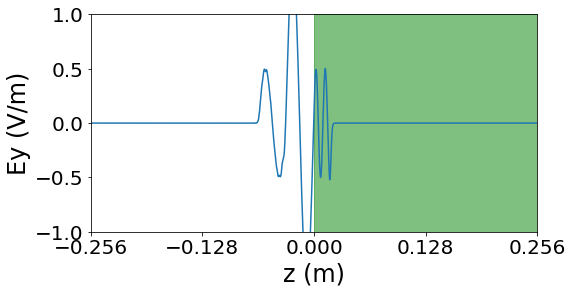

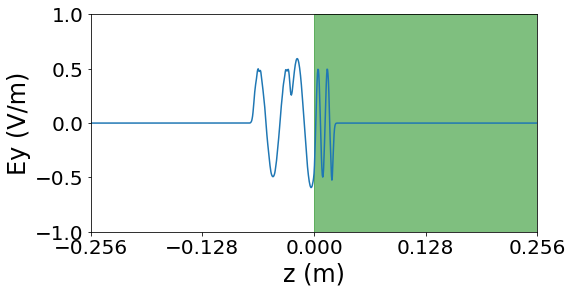

In [55]:
# Import statements
from platform import python_version
print(python_version())
import yt ; 
yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
import math
import cmath
import os
#%matplotlib notebook
iteration = 0
dt_iter = 20
while iteration < 300 :
    ds = yt.load( './diags/diag1'+str(iteration).zfill(5) ) # Create a dataset object\n",
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    xCell = ds.domain_dimensions[0]
    yCell = ds.domain_dimensions[1]
    zCell = ds.domain_dimensions[2]
    z_array = ad0['z'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    plt.figure(figsize=(8,4))
    plt.plot(z_array[int(xCell/2),int(yCell/2),:]-z_array[int(xCell/2),int(yCell/2),int(zCell/2)],Ey_array[int(xCell/2),int(yCell/2),:])
    plt.ylim(-1, 1)
    plt.xlim(-256e-3, 256.000001e-3)
    plt.xticks(np.arange(-256.e-3, 256.000001e-3, step=128.e-3))
    plt.xlabel('z (m)')
    plt.ylabel('Ey (V/m)')
    max_Ey = max(Ey_array[int(xCell/2), int(yCell/2), int(zCell/2):zCell])
    print(max_Ey)
    plt.axvspan(0.e-3, 256.e-3, color='green', alpha=0.5)
    plt.savefig(str(iteration).zfill(5)+'.png',bbox_inches = "tight")
    iteration = iteration + dt_iter
    
wavelength = 32.e-3
mu0 = 4*math.pi*1.e-7
epsilon0 = 8.86e-12
c0 = 1/math.sqrt(mu0*epsilon0)
omega = 2*math.pi*c0/wavelength
sigma = 5 # conductivity of media
gamma = 1j*omega*math.sqrt(mu0*epsilon0)*cmath.sqrt(1-1j*sigma/omega/epsilon0)
eta = 1j*omega*mu0/gamma # intrinsic impedance of media
c = 1/cmath.sqrt(mu0*(epsilon0-1j*sigma/omega)) #speed of light in media
dt = 1.225592745e-12
#z_obs = 128e-3
#nt = z_obs/c0/dt
nt = 250
z_obs = nt*dt*np.real(c)
z_obs = 0.1
print("speed of light in vacuum", c0)
print("speed of light in media", c)
print("frequency = ", omega/2/math.pi)
print("propagation const = ", gamma)
print("intrinsic impedance = ", eta)
print("tranmission coef = ", 2*eta/(eta+120*math.pi))
print("reflection coef =", (eta-120*math.pi)/(eta+120*math.pi))
print("observation time point", nt)
print("observation point z =", z_obs)
print("attenuation term = ", math.exp(-np.real(gamma)*z_obs))